**Sentiment Analysis Using Machine Learning Model**

Sentiment Analysis involves the use of machine learning model to identify and categorize the opinions as expressed in a text,tweets or chats about a brand or a product in order to determine if the opinions or sentiments is positive, negative or neutral.

Model like helps the brand or product team to know if the products is doing well or there is a defect needed to be improved or maybe the pricing strategy is not what the people and so many other reasons.

**Goals and objectives of the project**

The goal of this project is to see if our machine learning model can accurately, to a large extent, predict if a sentiment will be positive or negative by just going through the tweets.

**Dataset Description**

We looked through tens of thousands of tweets about the early August GOP debate in Ohio and asked contributors to do both sentiment analysis and data categorization. Contributors were asked if the tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given tweet. We've removed the non-relevant messages from the uploaded dataset.

In [1]:
data <- read.csv('../input/twitter-sentiment-analysis/Sentiment_Data.csv')
head(data)

id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,⋯,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
1,No candidate mentioned,1.0000,yes,1,Neutral,0.6578,None of the above,1.0000,,⋯,,5,,,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,,07/08/2015 09:54,6.29697e+17,,Quito
2,Scott Walker,1.0000,yes,1,Positive,0.6333,None of the above,1.0000,,⋯,,26,,,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,,07/08/2015 09:54,6.29697e+17,,
3,No candidate mentioned,1.0000,yes,1,Neutral,0.6629,None of the above,0.6629,,⋯,,27,,,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,,07/08/2015 09:54,6.29697e+17,,
4,No candidate mentioned,1.0000,yes,1,Positive,1.0000,None of the above,0.7039,,⋯,,138,,,RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …,,07/08/2015 09:54,6.29697e+17,Texas,Central Time (US & Canada)
5,Donald Trump,1.0000,yes,1,Positive,0.7045,None of the above,1.0000,,⋯,,156,,,RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…,,07/08/2015 09:54,6.29697e+17,,Arizona
6,Ted Cruz,0.6332,yes,1,Positive,0.6332,None of the above,1.0000,,⋯,,228,,,"RT @GregAbbott_TX: @TedCruz: ""On my first day I will rescind every illegal executive action taken by Barack Obama."" #GOPDebate @FoxNews",,07/08/2015 09:54,6.29697e+17,,Central Time (US & Canada)


The dataset has got so many other relevant information which include the name of the candidate that is involved, sentiment expressed and so on; but we will be limited to the text and the sentiment columns.

In [2]:
library(tidyverse)
data_1 <- data %>% 
                select(text, sentiment)
head(data_1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0.9000     ✔ purrr   0.3.1     
✔ tibble  2.0.1          ✔ dplyr   0.8.0.1   
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


text,sentiment
RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,Neutral
RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,Positive
RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,Neutral
RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …,Positive
RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…,Positive
"RT @GregAbbott_TX: @TedCruz: ""On my first day I will rescind every illegal executive action taken by Barack Obama."" #GOPDebate @FoxNews",Positive


**Structure of the dataset**

It is always a good practice to see if the dataset is in the right structure, i.e a variable that is numeric is not stored as string and so on.

We also need to check the proportion of the classes in the sentiment column.

In [3]:
str(data_1)

'data.frame':	13871 obs. of  2 variables:
 $ text     : Factor w/ 10402 levels "- No longer any true #conservatives in politics; or Kennedy #democrats for that matter #GOPDebate #GOPDebates @KayEm60",..: 7362 8087 8617 7909 5567 6118 8761 2827 2439 7371 ...
 $ sentiment: Factor w/ 3 levels "Negative","Neutral",..: 2 3 2 3 3 3 1 2 1 1 ...


In [4]:
round(prop.table(table(data_1$sentiment)),2)


Negative  Neutral Positive 
    0.61     0.23     0.16 

The variables are in the right structure and the proportion of sentiments in our dataset is that we have 61% as negative, 23% as neutral and 16% as positive.

gopdebate is the most frequent word in all of the three(3) categories which is just the slogan of the debate and hence is not making any contribution to how well will a sentiment be classified.

**Data Cleaning**

Data often come from different sources and most of the time don’t come in the right format for the machine to process them. Hence, data cleaning is an important aspect of a data science project. 

Hence, working with text data is more tricky that regular data and one of the reasons for that is because text may come in different forms with different combinations of both upper and lower cases, slangs, the use of symbols such as @, &; and so on. In text mining, we need to put the words in lowercase, remove stops words that do not add any meaning to the model etc.

In [5]:
library(tm)
## Loading required package: NLP
library(SnowballC)
corpus = VCorpus(VectorSource(data_1$text))
# a snap shot of the first text stored in the corpus
as.character(corpus[[1]])

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate



[1] "RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate"

With this code here, we are taking all of the text to lower case, remove numbers, remove puntuation, stopwords and so on.

In [6]:
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)
as.character(corpus[[1]])

[1] "rt nancyleegrahn everyon feel climat chang question last night exact gopdeb"

**Creating the Document Term Matrix for the model**

A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

In [7]:
dtm = DocumentTermMatrix(corpus)
dtm
dim(dtm)

<<DocumentTermMatrix (documents: 13871, terms: 16094)>>
Non-/sparse entries: 138144/223101730
Sparsity           : 100%
Maximal term length: 60
Weighting          : term frequency (tf)

[1] 13871 16094

The document-term matrix presently has 16,094 words extracted from 13,871 tweets. These words are what we will use to decide if a tweet is positive or negative.

The sparcity of the dtm is 100% which means no words is left out the matrix. 

In [8]:
dtm = removeSparseTerms(dtm, 0.999)
dim(dtm)

[1] 13871  1209

In [9]:
#Inspecting the the first 10 tweets and the first 15 words in the dataset
inspect(dtm[0:10, 1:15])

<<DocumentTermMatrix (documents: 10, terms: 15)>>
Non-/sparse entries: 0/150
Sparsity           : 100%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs abc abl abort absolut abt accept accord across act actual add address
  1    0   0     0       0   0      0      0      0   0      0   0       0
  2    0   0     0       0   0      0      0      0   0      0   0       0
  3    0   0     0       0   0      0      0      0   0      0   0       0
  4    0   0     0       0   0      0      0      0   0      0   0       0
  5    0   0     0       0   0      0      0      0   0      0   0       0
  6    0   0     0       0   0      0      0      0   0      0   0       0
  7    0   0     0       0   0      0      0      0   0      0   0       0
  8    0   0     0       0   0      0      0      0   0      0   0       0
  9    0   0     0       0   0      0      0      0   0      0   0       0
  10   0   0     0       0   0      0      0      0 

In [10]:
freq<- sort(colSums(as.matrix(dtm)), decreasing=TRUE)

It is good to have look at words that appered more than 60 times.

In [11]:
findFreqTerms(dtm, lowfreq=60) #identifying terms that appears more than 60times

[1] "abort"           "act"             "actual"          "admit"          
  [5] "adult"           "agre"            "alway"           "america"        
  [9] "american"        "amp"             "anoth"           "answer"         
 [13] "anyon"           "ask"             "attack"          "audienc"        
 [17] "away"            "back"            "bad"             "balanc"         
 [21] "band"            "believ"          "ben"             "berni"          
 [25] "best"            "better"          "bettyfckinwhit"  "big"            
 [29] "biggest"         "black"           "blacklivesmatt"  "bodi"           
 [33] "boy"             "break"           "bretbaier"       "bring"          
 [37] "bush"            "call"            "cam"             "came"           
 [41] "campaign"        "can"             "candid"          "cant"           
 [45] "car"             "care"            "carlyfiorina"    "carson"         
 [49] "chang"           "check"           "cherri"          "chris"          
 [53] "chrischristi"    "christi"         "christian"       "clear"          
 [57] "climat"          "clinton"         "close"           "cnn"            
 [61] "come"            "comment"         "conduct"         "conserv"        
 [65] "control"         "correct"         "countri"         "cruz"           
 [69] "cut"             "day"             "dear"            "debat"          
 [73] "democrat"        "democraticdeb"   "deserv"          "didnt"          
 [77] "disappoint"      "discuss"         "doesnt"          "donald"         
 [81] "donaldtrump"     "donniewahlberg"  "dont"            "doubledigit"    
 [85] "drink"           "elect"           "elev"            "els"            
 [89] "end"             "enjoy"           "enough"          "entertain"      
 [93] "ericstonestreet" "even"            "ever"            "everi"          
 [97] "everyon"         "expos"           "face"            "fact"           
[101] "fail"            "fair"            "favorit"         "feel"           
[105] "field"           "fight"           "financ"          "fiorina"        
[109] "first"           "focus"           "follow"          "forward"        
[113] "fox"             "foxdeb"          "foxnew"          "frankluntz"     
[117] "friend"          "frontrunn"       "fuck"            "fun"            
[121] "futur"           "game"            "gay"             "get"            
[125] "give"            "given"           "god"             "goldietaylor"   
[129] "good"            "gop"             "gopd…"           "gopdeb"         
[133] "gopdebat…"       "gopdebate…"      "got"             "govchristi"     
[137] "govern"          "govmikehuckabe"  "great"           "gun"            
[141] "guy"             "hair"            "hand"            "happen"         
[145] "hard"            "hate"            "head"            "hear"           
[149] "hell"            "help"            "hes"             "hey"            
[153] "hillari"         "hillaryclinton"  "hold"            "hope"           
[157] "http…"           "httpt…"          "huckabe"         "hug"            
[161] "ignor"           "ill"             "illeg"           "immigr"         
[165] "import"          "influenc"        "interest"        "iran"           
[169] "isnt"            "issu"            "ive"             "jamiaw"         
[173] "jeb"             "jebbush"         "job"             "john"           
[177] "johnkasich"      "just"            "kasich"          "keep"           
[181] "kelli"           "kill"            "kkkorgop"        "know"           
[185] "larryeld"        "last"            "law"             "lead"           
[189] "leader"          "learn"           "legitim"         "let"            
[193] "liber"           "lie"             "life"            "like"           
[197] "line"            "listen"          "littl"           "live"           
[201] "lol"             "long"            "look"            "loser"          
[205] "lot"             

In [12]:
library(ggplot2)
wf<- data.frame(word=names(freq), freq=freq)
head(wf)

,word,freq
gopdeb,gopdeb,14130
rwsurfergirl,rwsurfergirl,1969
trump,trump,1964
fox,fox,1320
debat,debat,1252
candid,candid,1154


Loading required package: RColorBrewer


,text,sentiment
2,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,Positive
4,RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …,Positive
5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…,Positive
6,"RT @GregAbbott_TX: @TedCruz: ""On my first day I will rescind every illegal executive action taken by Barack Obama."" #GOPDebate @FoxNews",Positive
12,RT @WayneDupreeShow: Just woke up to tweet this out #GOPDebate Best line of the night via @GovMikeHuckabee http://t.co/6OV5hxHIcV,Positive
15,RT @pattonoswalt: I loved Scott Walker as Mark Harmon's romantic rival in SUMMER SCHOOL. Look it up. #GOPDebate,Positive


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”

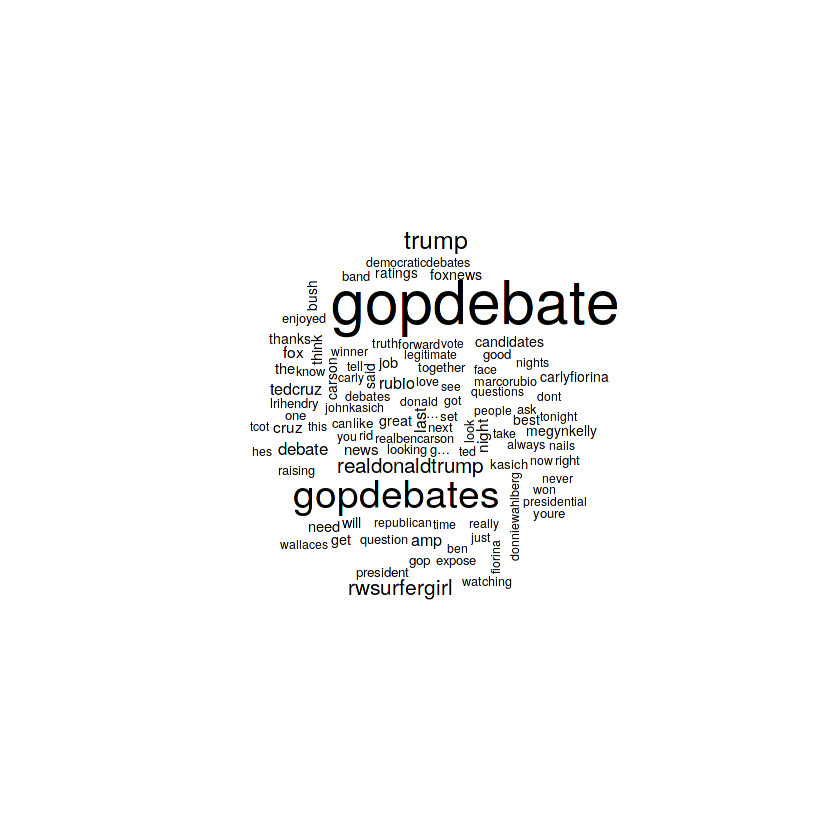

In [13]:
library("wordcloud")
positive <- subset(data_1,sentiment=="Positive")
head(positive)
wordcloud(positive$text, max.words = 100, scale = c(3,0.5))

,text,sentiment
7,RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly https://…,Negative
9,"Deer in the headlights RT @lizzwinstead: Ben Carson, may be the only brain surgeon who has performed a lobotomy on himself. #GOPDebate",Negative
10,RT @NancyOsborne180: Last night's debate proved it! #GOPDebate #BATsAsk @BadassTeachersA #TBATs https://t.co/G2gGjY1bJD,Negative
11,@JGreenDC @realDonaldTrump In all fairness #BillClinton owns that phrase.#GOPDebate,Negative
13,Me reading my family's comments about how great the #GOPDebate was http://t.co/gIaGjPygXZ,Negative
16,Hey @ChrisChristie exploiting the tragedy of 9/11 for your own political gain is @rudygiulianiGOP's thing #GOPDebate,Negative


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”

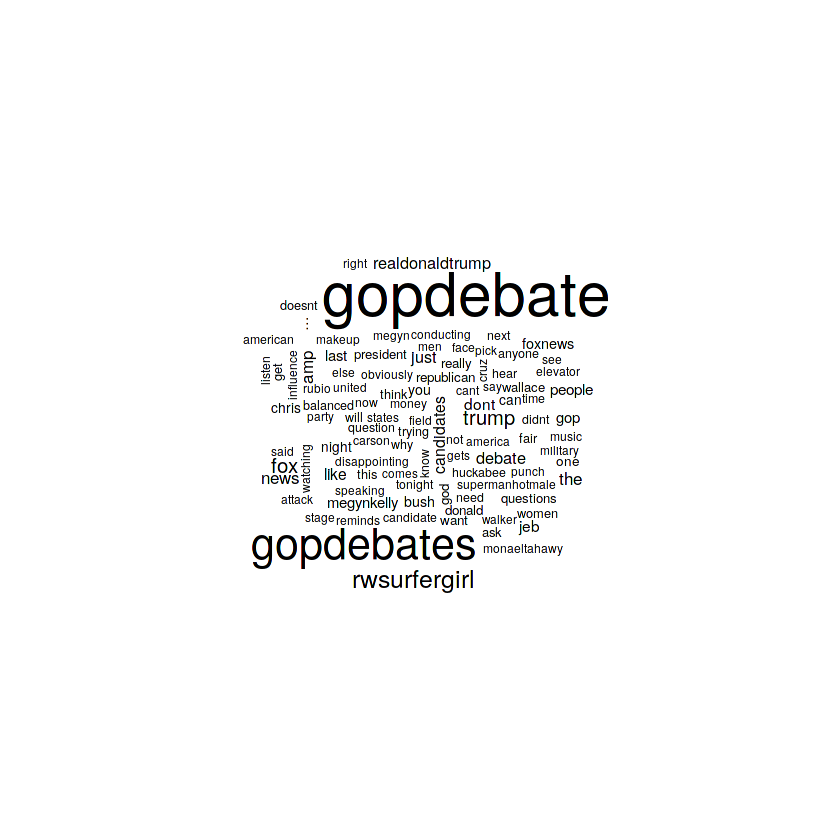

In [14]:
negative <- subset(data_1,sentiment=="Negative")
head(negative)
wordcloud(negative$text, max.words = 100, scale = c(3,0.5))

,text,sentiment
1,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,Neutral
3,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,Neutral
8,Going on #MSNBC Live with @ThomasARoberts around 2 PM ET. #GOPDebate,Neutral
14,"RT @ArcticFox2016: RT @AllenWestRepub ""Dear @JebBush #GOPDebate #NotAMistake http://t.co/TtFG7KYcd9""",Neutral
24,RT @thekevinryder: #GOPDebate (Vine by @dabulldawg88) https://t.co/XKxVDrADce,Neutral
33,The First #GOPDebate: Social Media Reaction and More http://t.co/X6KUVSkltF,Neutral


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”

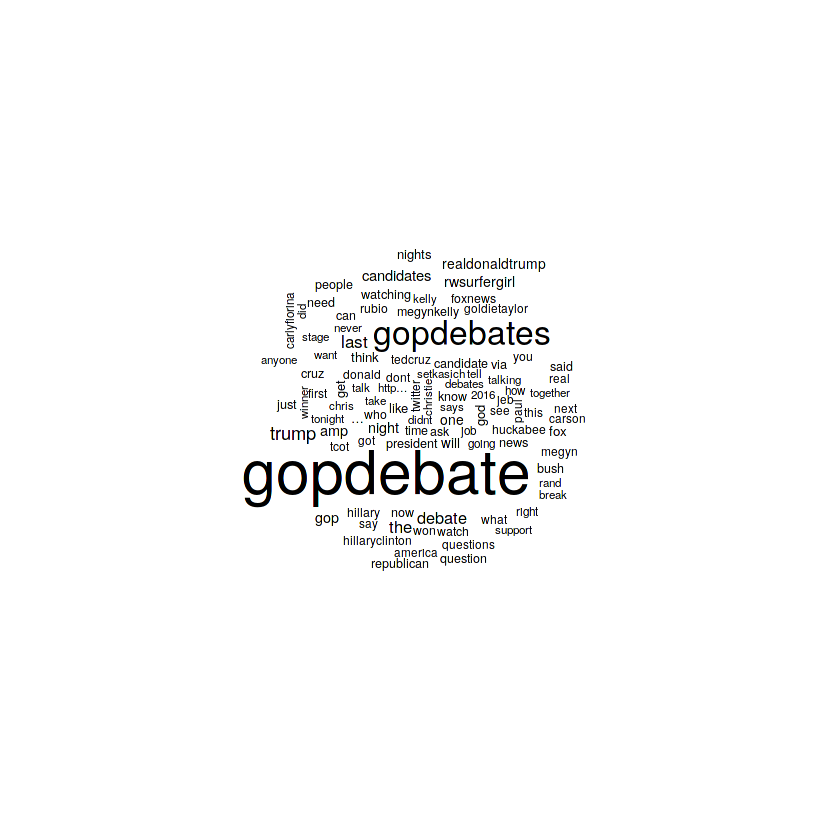

In [15]:
neutral <- subset(data_1,sentiment=="Neutral")
head(neutral)
wordcloud(neutral$text, max.words = 100, scale = c(3,0.5))

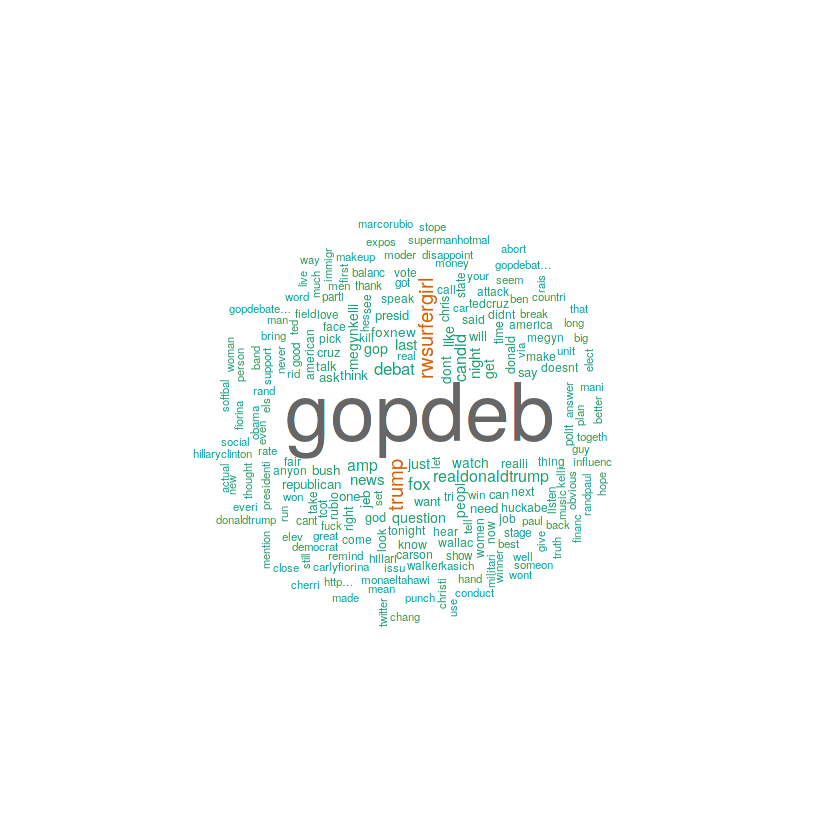

In [16]:
library("wordcloud")

## Loading required package: RColorBrewer
library("RColorBrewer")
set.seed(1234)
wordcloud(words = wf$word, freq = wf$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

Naive Bayes trains on categorical data, the numerical data is converted to categorical data. We will convert the numeric features by creating a function that converts any non-zero positive value to “Yes” and all zero values to “No” to state whether a specific term is present in the document.

In [17]:
convert_count <- function(x) {
    y <- ifelse(x > 0, 1,0)
    y <- factor(y, levels=c(0,1), labels=c("No", "Yes"))
    y
}

In [18]:
# Apply the convert_count function to get final training and testing DTMs
datasetNB <- apply(dtm, 2, convert_count)

dataset = as.data.frame(as.matrix(datasetNB))

The text corpus is now stored as a dataframe and hence, we will need to merge that with the class variable.

In [19]:
dataset$Class = data_1$sentiment
str(dataset$Class)

 Factor w/ 3 levels "Negative","Neutral",..: 2 3 2 3 3 3 1 2 1 1 ...


In [20]:
head(dataset)
dim(dataset)

abc,abl,abort,absolut,abt,accept,accord,across,act,actual,⋯,yes,yesterday,yet,young,your,youtub,yrs,zero,zinger,Class
No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Neutral
No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positive
No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Neutral
No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positive
No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positive
No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,Positive


[1] 13871  1210

**Data Splitting**

In [21]:
set.seed(222)
split = sample(2,nrow(dataset),prob = c(0.75,0.25),replace = TRUE)
train_set = dataset[split == 1,]
test_set = dataset[split == 2,] 

prop.table(table(train_set$Class))
prop.table(table(test_set$Class))


 Negative   Neutral  Positive 
0.6146983 0.2282452 0.1570565 


 Negative   Neutral  Positive 
0.6049884 0.2212877 0.1737239 

**Model Training**

**1. Random Forest Model**

In [22]:
library(randomForest)
rf_classifier = randomForest(x = train_set[-1210],
                             y = train_set$Class,
                             ntree = 300)

rf_classifier

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin




Call:
 randomForest(x = train_set[-1210], y = train_set$Class, ntree = 300) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 34

        OOB estimate of  error rate: 31.94%
Confusion matrix:
         Negative Neutral Positive class.error
Negative     5647     533      227   0.1186203
Neutral      1471     706      202   0.7032367
Positive      762     134      741   0.5473427

**Model Evaluation for Random Forest**

In [23]:
# Predicting the Test set results
rf_pred = predict(rf_classifier, newdata = test_set[-1210])

# Making the Confusion Matrix
library(caret)

confusionMatrix(table(rf_pred,test_set$Class))

Loading required package: lattice
Warning message:
“replacing previous import ‘ggplot2::empty’ by ‘plyr::empty’ when loading ‘caret’”
Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



Confusion Matrix and Statistics

          
rf_pred    Negative Neutral Positive
  Negative     1863     469      287
  Neutral       142     232       50
  Positive       81      62      262

Overall Statistics
                                          
               Accuracy : 0.6836          
                 95% CI : (0.6678, 0.6991)
    No Information Rate : 0.605           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.358           
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: Negative Class: Neutral Class: Positive
Sensitivity                   0.8931        0.30406         0.43740
Specificity                   0.4449        0.92849         0.94981
Pos Pred Value                0.7113        0.54717         0.64691
Neg Pred Value                0.7310        0.82440         0.88925
Prevalence                    0.6050        0.22129         0.17372
Detection Rat

**2. Naive Bayes**

In [24]:
library(e1071)
control <- trainControl(method="repeatedcv", number=10, repeats=3)
system.time( classifier_nb <- naiveBayes(train_set, train_set$Class, laplace = 1,
                                         trControl = control,tuneLength = 7) )

   user  system elapsed 
  0.612   0.196   0.811 

**Model Evaluation for Naive Bayes**

In [25]:
nb_pred = predict(classifier_nb, type = 'class', newdata = test_set)

confusionMatrix(nb_pred,test_set$Class)

Confusion Matrix and Statistics

          Reference
Prediction Negative Neutral Positive
  Negative     2079       6        0
  Neutral         0     742        1
  Positive        7      15      598

Overall Statistics
                                          
               Accuracy : 0.9916          
                 95% CI : (0.9879, 0.9944)
    No Information Rate : 0.605           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9849          
 Mcnemar's Test P-Value : 1.369e-05       

Statistics by Class:

                     Class: Negative Class: Neutral Class: Positive
Sensitivity                   0.9966         0.9725          0.9983
Specificity                   0.9956         0.9996          0.9923
Pos Pred Value                0.9971         0.9987          0.9645
Neg Pred Value                0.9949         0.9922          0.9996
Prevalence                    0.6050         0.2213          0.1737
Dete

**3. Support Vector Machine**

In [26]:
svm_classifier <- svm(Class~., data=train_set)
svm_classifier


Call:
svm(formula = Class ~ ., data = train_set)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.0008264463 

Number of Support Vectors:  7370


**Model Evaluation for Support Vector Machine**

In [27]:
svm_pred = predict(svm_classifier,test_set)

confusionMatrix(svm_pred,test_set$Class)

Confusion Matrix and Statistics

          Reference
Prediction Negative Neutral Positive
  Negative     2078     760      596
  Neutral         8       3        3
  Positive        0       0        0

Overall Statistics
                                         
               Accuracy : 0.6035         
                 95% CI : (0.587, 0.6199)
    No Information Rate : 0.605          
    P-Value [Acc > NIR] : 0.5764         
                                         
                  Kappa : 3e-04          
 Mcnemar's Test P-Value : <2e-16         

Statistics by Class:

                     Class: Negative Class: Neutral Class: Positive
Sensitivity                 0.996165      0.0039318          0.0000
Specificity                 0.004405      0.9959032          1.0000
Pos Pred Value              0.605125      0.2142857             NaN
Neg Pred Value              0.428571      0.7786838          0.8263
Prevalence                  0.604988      0.2212877          0.1737
Detection Ra

Naive Bayes model performs the best with 99% accuracy as compared to Support Vector Machine and Random Forest model with 60% and 68% respectively. Naive Bayes works on the assumption that the features of the dataset are independent of each other — hence called Naive.

It works well for bag-of-words models a.k.a text documents since words in a text document are independent of each other; the location of one word doesn’t depend on another word.Hence, it satisfys the independence assumption of the Naive Bayes model. 

It is therefore the most commonly used model for text classification, sentiment analysis, spam filtering & recommendation systems.